In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv(r'C:\Users\wlpch\Documents\sab\healthcare-dataset-stroke-data\healthcare-dataset-stroke-data.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='stroke', ylabel='count'>

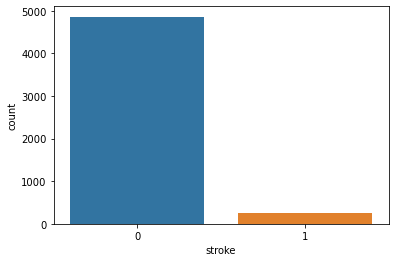

In [5]:
sns.countplot(x="stroke", data=data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:xlabel='bmi'>

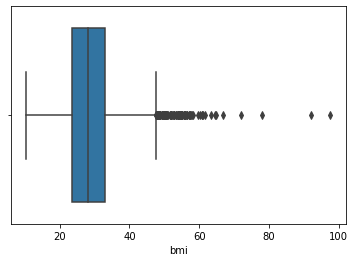

In [7]:
sns.boxplot(x='bmi',data=data)

In [8]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [9]:
data_dup=data
X=data_dup.iloc[:,1:-1]
y=data_dup.iloc[:,-1]

In [10]:
num_obj = [var for var in X.columns if X[var].dtypes == 'O']
print(num_obj)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [11]:
for vars_encode in num_obj:
    Parchnum={ni:indi for indi,ni in enumerate(set(X[vars_encode]))}
    X[vars_encode]=[Parchnum[ni] for ni in X[vars_encode]]

In [65]:
X['avg_glucose_level']=np.log(X['avg_glucose_level'])

In [67]:
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.226614,0.097456,0.054012,0.656164,1.300000,0.508023,4.592465,28.893237,1.623092
std,0.492941,22.612647,0.296607,0.226063,0.475034,1.604402,0.499985,0.361985,7.698018,1.071534
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,4.009513,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.346982,23.800000,1.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.520538,28.400000,1.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,4.736988,32.800000,3.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.604846,97.600000,3.000000


In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [69]:
from sklearn.model_selection import train_test_split,StratifiedKFold
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
testy.value_counts()

0    968
1     54
Name: stroke, dtype: int64

In [91]:
model=Sequential()
model.add(tf.keras.Input(shape=(trainX.shape[1],)))
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=512,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
opt=Adam(learning_rate=0.01)
bce = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss=bce)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,r2_score

In [76]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_smote,y_smote=smote.fit_resample(trainX,trainy)

In [92]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
score_list = []
folds = 1
oof = np.zeros(len(X_smote))


y_pred_list = []

for train_index, test_index in skf.split(X_smote,y_smote):
    X_train, X_val = X_smote.iloc[train_index], X_smote.iloc[test_index]
    y_train, y_val = y_smote.iloc[train_index], y_smote.iloc[test_index]

    
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.fit_transform(X_val)
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', patience=2)
    
    ann_model = model
    ann_model.fit(x=X_train,y=y_train,
                  validation_data=(X_val, y_val), epochs=20, batch_size=50,callbacks=[early_stop])
    
    y_preds = ann_model.predict(X_val)
    y_preds = np.where(y_preds > 0.5, 1,0)
    
    oof[test_index] = y_preds.reshape(-1,)
    score = r2_score(y_val, oof[test_index])
    score_list.append(score)
    print(f"Accuracy in folds {folds} : {score}")
    
    
    folds +=1
    
print(score_list)

Epoch 1/20
141/141 [==============================] - 1s 2ms/step - loss: 0.5480 - val_loss: 0.3868
Epoch 2/20
141/141 [==============================] - 0s 2ms/step - loss: 0.3771 - val_loss: 0.3622
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.3228 - val_loss: 0.4046
Epoch 4/20
141/141 [==============================] - 0s 1ms/step - loss: 0.3181 - val_loss: 0.3273
Epoch 5/20
141/141 [==============================] - 0s 1ms/step - loss: 0.3141 - val_loss: 0.3170
Accuracy in folds 1 : 0.5121943181069145
Epoch 1/20
141/141 [==============================] - 0s 2ms/step - loss: 0.2838 - val_loss: 0.2556
Epoch 2/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2731 - val_loss: 0.2494
Epoch 3/20
141/141 [==============================] - 0s 1ms/step - loss: 0.2606 - val_loss: 0.2454
Accuracy in folds 2 : 0.6148902511370378
Epoch 1/20
141/141 [==============================] - 0s 2ms/step - loss: 0.2580 - val_loss: 0.2414
Epoch 2/20
141/141

In [83]:
oof=0

In [93]:
print(np.mean(score))

0.8046272493573265


In [94]:
print(classification_report(y_smote, oof))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3893
           1       0.91      0.94      0.92      3893

    accuracy                           0.92      7786
   macro avg       0.92      0.92      0.92      7786
weighted avg       0.92      0.92      0.92      7786



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics='accuracy')
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(trainX,trainy,validation_data=(testX,testy))

In [ ]:
tuner.results_summary()